In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
%%time

df=pd.read_csv("en.openfoodfacts.org.products.csv",
              sep="\t", encoding="utf-8", low_memory=False)

In [4]:
%%time

df

CPU times: total: 0 ns
Wall time: 0 ns


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,stephane,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,Skyr,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,http://world-en.openfoodfacts.org/product/3292...,kiliweb,1509909912,2017-11-05T19:25:12Z,1681141329,2023-04-10T15:42:09Z,moon-rabbit,Instant feerique,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830751,35033264,http://world-en.openfoodfacts.org/product/3503...,kiliweb,1583067829,2020-03-01T13:03:49Z,1681320470,2023-04-12T17:27:50Z,xdesnoyers,DooWap,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830752,39240958,http://world-en.openfoodfacts.org/product/3924...,kiliweb,1522995251,2018-04-06T06:14:11Z,1681320420,2023-04-12T17:27:00Z,xdesnoyers,Doowap,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830753,72355671,http://world-en.openfoodfacts.org/product/7235...,kiliweb,1558252418,2019-05-19T07:53:38Z,1680877496,2023-04-07T14:24:56Z,itsjustruby,Almond Butter,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Comparaison nombre null entre plusieurs colonnes semblables

### Packaging

In [5]:
df['packaging'].isna().sum()

2457066

In [25]:
df['packaging_tags'].isna().sum()

2457073

In [6]:
df['packaging_en'].isna().sum()

2457082

In [31]:
mask_packaging = df[['packaging', 'packaging_tags', 'packaging_en']].notnull().all(axis=1)
df.loc[mask_packaging, ['packaging', 'packaging_tags', 'packaging_en']]

,packaging,packaging_tags,packaging_en
32,"Plastique, Barquette","en:plastic,en:tray","Plastic,Tray"
73,Glass,en:glass,Glass
91,Boîte en métal,fr:boite-en-metal,fr:boite-en-metal
181,"Plastique, Bocal","en:plastic,en:jar","Plastic,Jar"
188,Plastique,en:plastic,Plastic
...,...,...,...
2830709,HDPE,"en:plastic,en:hdpe-high-density-polyethylene","Plastic,Hdpe-high-density-polyethylene"
2830731,"Kunststoff, Styropor","en:plastic,de:styropor","Plastic,de:styropor"
2830744,Boîte,en:box,Box
2830746,"Plastique, Sachet","en:plastic,en:bag","Plastic,Bag"


### brands

In [35]:
df['brands'].isna().sum()

1403611

In [33]:
df['brands_tags'].isna().sum()

1403739

In [36]:
mask_brands = df[['brands', 'brands_tags']].notnull().all(axis=1)
df.loc[mask_brands, ['brands', 'brands_tags']]

,brands,brands_tags
0,endives,endives
3,Danone,danone
11,courte paille,courte-paille
27,Japet Dels Bous,japet-dels-bous
29,Jeff de Bruges,jeff-de-bruges
...,...,...
2830750,Thiriet,thiriet
2830751,Harrys,harrys
2830752,Harrys,harrys
2830753,Harrys,harrys


### categories

In [38]:
df['categories'].isna().sum()

1619313

In [39]:
df['categories_tags'].isna().sum()

1619317

In [41]:
df['categories_en'].isna().sum()

1619318

In [42]:
mask_categories = df[['categories', 'categories_tags', 'categories_en']].notnull().all(axis=1)
df.loc[mask_categories, ['categories', 'categories_tags', 'categories_en']]

,categories,categories_tags,categories_en
3,"Produits laitiers, Desserts, Produits fermenté...","en:dairies,en:fermented-foods,en:desserts,en:f...","Dairies,Fermented foods,Desserts,Fermented mil..."
11,"Condiments, Sauces, Moutardes, en:groceries","en:condiments,en:sauces,en:mustards,en:groceries","Condiments,Sauces,Mustards,Groceries"
20,"Aliments et boissons à base de végétaux, Boiss...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan..."
21,"Snacks, Snacks sucrés, Confiseries, Massepain,...","en:snacks,en:sweet-snacks,en:confectioneries,e...","Snacks,Sweet snacks,Confectioneries,Marzipan,A..."
23,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
...,...,...,...
2830750,"Desserts,Frozen foods,Frozen desserts","en:desserts,en:frozen-foods,en:frozen-desserts","Desserts,Frozen foods,Frozen desserts"
2830751,en:brioches,"en:snacks,en:sweet-snacks,en:viennoiseries,en:...","Snacks,Sweet snacks,Viennoiseries,Brioches"
2830752,en:brioches,"en:snacks,en:sweet-snacks,en:viennoiseries,en:...","Snacks,Sweet snacks,Viennoiseries,Brioches"
2830753,en:almond-butters,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."


### Origins

In [12]:
df['origins'].isna().sum()

2719525

In [13]:
df['origins_tags'].isna().sum()

2719653

In [14]:
df['origins_en'].isna().sum()

2719661

In [37]:
mask_origins = df[['origins', 'origins_tags', 'origins_en']].notnull().all(axis=1)
df.loc[mask_origins, ['origins', 'origins_tags', 'origins_en']]

,origins,origins_tags,origins_en
2,Spain,en:spain,Spain
362,France,en:france,France
365,Québec,fr:quebec,fr:quebec
381,Québec,fr:quebec,fr:quebec
404,France,en:france,France
...,...,...,...
2825230,Espagne,en:spain,Spain
2825330,Hongrie,en:hungary,Hungary
2825385,România,en:romania,Romania
2825394,france,en:france,France


### Manufacturing_places

In [19]:
df['manufacturing_places'].isna().sum()

2666220

In [20]:
df['manufacturing_places_tags'].isna().sum()

2666287

In [48]:
mask_manufacturing = df[['manufacturing_places', 'manufacturing_places_tags']].notnull().all(axis=1)
df.loc[mask_manufacturing, ['manufacturing_places', 'manufacturing_places_tags']]

,manufacturing_places,manufacturing_places_tags
73,bénivay-ollon,benivay-ollon
181,France,france
362,France,france
365,Brossard Québec,brossard-quebec
381,Brossard Québec,brossard-quebec
...,...,...
2825330,Hongrie,hongrie
2825385,y,y
2825437,Hongrie,hongrie
2830731,"Meppen,Deutschland","meppen,deutschland"


### Labels

In [27]:
df['labels'].isna().sum()

2118373

In [28]:
df['labels_tags'].isna().sum()

2118378

In [29]:
df['labels_en'].isna().sum()

2118401

In [44]:
mask_manufacturing = df[['labels', 'labels_tags','labels_en']].notnull().all(axis=1)
df.loc[mask_manufacturing, ['labels', 'labels_tags','labels_en']]

,labels,labels_tags,labels_en
11,Delois france,fr:delois-france,fr:delois-france
29,Fabriqué en France,en:made-in-france,Made in France
42,"Sans arômes artificiels, Sans colorants, Sans ...","en:no-artificial-flavors,en:no-preservatives,e...","No artificial flavors,No preservatives,No colo..."
57,"Bio, Bio européen, FR-BIO-01","en:organic,en:eu-organic,en:fr-bio-01","Organic,EU Organic,FR-BIO-01"
62,"Organic, EU Organic, fr:ab-agriculture-biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique"
...,...,...,...
2830743,"Nutriscore, Nutriscore Grade A, en:high-proteins","en:high-proteins,en:nutriscore,en:nutriscore-g...","High proteins,Nutriscore,Nutriscore Grade A"
2830744,"No preservatives, Nutriscore, Nutriscore Grade...","en:no-preservatives,fr:fruits-et-legumes-de-fr...","No preservatives,fr:Fruits et Légumes de Franc..."
2830746,"Sans huile de palme, Réduction d'eau consommée...","en:no-palm-oil,fr:reduction-d-eau-consommee-da...","No palm oil,fr:reduction-d-eau-consommee-dans-..."
2830750,fr:Entrepreneurs + Engagés,fr:entrepreneurs-engages,fr:Entrepreneurs + Engagés


### emb_codes

In [45]:
df['emb_codes'].isna().sum()

2683839

In [46]:
df['emb_codes_tags'].isna().sum()

2683889

In [50]:
mask_emb_codes = df[['emb_codes', 'emb_codes_tags']].notnull().all(axis=1)
df.loc[mask_emb_codes, ['emb_codes', 'emb_codes_tags']]

,emb_codes,emb_codes_tags
45,FR 72.264.002 EC,fr-72-264-002-ec
59,FR 56.017.001 EC,fr-56-017-001-ec
73,13089c,13089c
87,FR 60.341.011 EC,fr-60-341-011-ec
127,FR 49.119.001 EC,fr-49-119-001-ec
...,...,...
2825389,EMB 74289B,emb-74289b
2825394,FR 31.091.010 EC,fr-31-091-010-ec
2825437,L700412,l700412
2830671,EMB 78291B,emb-78291b


### cities

In [61]:
df['cities'].isna().sum()

2830755

In [65]:
df['cities_tags'].isna().sum()

2743454

In [75]:
mask_cities = df[['cities_tags']].notna().all(axis=1)
df.loc[mask_cities, ['cities_tags']]

,cities_tags
45,sable-sur-sarthe-sarthe-france
59,bignan-morbihan-france
87,lagny-le-sec-oise-france
127,daumeray-maine-et-loire-france
129,saint-andiol-bouches-du-rhone-france
...,...
2825337,wimille-pas-de-calais-france
2825389,vallieres-haute-savoie-france
2825394,bruguieres-haute-garonne-france
2830671,guerville-yvelines-france


### countries

In [69]:
df['countries'].isna().sum()

7544

In [72]:
df['countries_tags'].isna().sum()

7549

In [73]:
df['countries_en'].isna().sum()

7549

In [74]:
mask_countries = df[['countries', 'countries_tags','countries_en']].notnull().all(axis=1)
df.loc[mask_countries, ['countries', 'countries_tags','countries_en']]

,countries,countries_tags,countries_en
0,en:france,en:france,France
1,en:de,en:germany,Germany
2,Spain,en:spain,Spain
3,France,en:france,France
4,France,en:france,France
...,...,...,...
2830750,France,en:france,France
2830751,en:fr,en:france,France
2830752,France,en:france,France
2830753,en:FR,en:france,France


### traces

In [76]:
df['traces'].isna().sum()

2706928

In [77]:
df['traces_tags'].isna().sum()

2676938

In [79]:
df['traces_en'].isna().sum()

2678667

In [80]:
mask_traces = df[['traces', 'traces_tags','traces_en']].notnull().all(axis=1)
df.loc[mask_traces, ['traces', 'traces_tags','traces_en']]

,traces,traces_tags,traces_en
193,"en:eggs,en:milk","en:eggs,en:milk","Eggs,Milk"
312,"en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,...","en:eggs,en:gluten,en:milk,en:nuts,en:soybeans,...","Eggs,Gluten,Milk,Nuts,Soybeans,Oatmeal"
365,fr:CONTIENT : OEUF. LAIT. ANCHOIS. SOYA. BLE. ...,fr:contient-oeuf-lait-anchois-soya-ble-seigle-...,fr:contient-oeuf-lait-anchois-soya-ble-seigle-...
415,"en:gluten,en:soybeans,en:sulphur-dioxide-and-s...","en:gluten,en:soybeans,en:sulphur-dioxide-and-s...","Gluten,Soybeans,Sulphur dioxide and sulphites"
437,"en:gluten,fr:Peut contenir: Noix variés Soya ...","en:gluten,fr:peut-contenir-noix-varies-soya-la...","Gluten,fr:peut-contenir-noix-varies-soya-lait-..."
...,...,...,...
2825330,fr:crevette céleri œuf lait sésame,fr:crevette-celeri-oeuf-lait-sesame,fr:crevette-celeri-oeuf-lait-sesame
2825437,"en:celery,en:crustaceans,en:molluscs,en:mustar...","en:celery,en:crustaceans,en:molluscs,en:mustar...","Celery,Crustaceans,Molluscs,Mustard,Sesame seeds"
2830746,"en:milk,en:mustard,en:nuts,en:sesame-seeds,en:...","en:milk,en:mustard,en:nuts,en:sesame-seeds,en:...","Milk,Mustard,Nuts,Sesame seeds,Soybeans"
2830749,en:celery,en:celery,Celery


### additives

In [81]:
df['additives'].isna().sum()

2830753

In [82]:
df['additives_tags'].isna().sum()

2358337

In [83]:
df['additives_en'].isna().sum()

2358337

In [84]:
mask_traces = df[['additives', 'additives_tags','additives_en']].notnull().all(axis=1)
df.loc[mask_traces, ['additives', 'additives_tags','additives_en']]

,additives,additives_tags,additives_en
863471,[ 59-garniture -> fr:59-garniture ] [ 59 ->...,"en:e250,en:e270,en:e301,en:e579","E250 - Sodium nitrite,E270 - Lactic acid,E301 ..."


### Suppression colonnes _tags et etc

In [92]:
cols_to_drop = ['packaging', 'packaging_tags', 'brands_tags', 'categories', 'categories_tags',
                'origins', 'origins_tags', 'manufacturing_places_tags', 'labels', 'labels_tags',
                'emb_codes_tags', 'cities', 'countries', 'countries_tags', 'traces', 'traces_tags',
                'additives', 'additives_tags'
                ]

In [93]:
df_withoutduplicatefeatures = df.drop(columns=cols_to_drop)
df_withoutduplicatefeatures

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,stephane,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,Skyr,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,http://world-en.openfoodfacts.org/product/3292...,kiliweb,1509909912,2017-11-05T19:25:12Z,1681141329,2023-04-10T15:42:09Z,moon-rabbit,Instant feerique,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830751,35033264,http://world-en.openfoodfacts.org/product/3503...,kiliweb,1583067829,2020-03-01T13:03:49Z,1681320470,2023-04-12T17:27:50Z,xdesnoyers,DooWap,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830752,39240958,http://world-en.openfoodfacts.org/product/3924...,kiliweb,1522995251,2018-04-06T06:14:11Z,1681320420,2023-04-12T17:27:00Z,xdesnoyers,Doowap,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830753,72355671,http://world-en.openfoodfacts.org/product/7235...,kiliweb,1558252418,2019-05-19T07:53:38Z,1680877496,2023-04-07T14:24:56Z,itsjustruby,Almond Butter,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_withoutduplicatefeatures.to_csv("df_withoutduplicatefeatures.csv", sep='\t', encoding='utf-8', index=False)

### Autres colonnes à suppr

In [125]:
df['created_t'].isna().sum()

0

In [96]:
df['created_datetime'].isna().sum()

0

In [97]:
df['last_modified_t'].isna().sum()

0

In [98]:
df['last_modified_datetime'].isna().sum()

0

In [99]:
df['main_category'].isna().sum()

1619317

In [107]:
df['main_category_en'].isna().sum()

1619318

In [101]:
df['image_url'].isna().sum()

531206

In [102]:
df['image_small_url'].isna().sum()

531206

In [16]:
pd.options.display.max_colwidth = 100

In [116]:
mask_traces = df[['code','image_url','image_small_url']].notnull().all(axis=1)
df.loc[mask_traces, ['code','image_url','image_small_url']].head(20)

,code,image_url,image_small_url
2,00000000000003429145,https://images.openfoodfacts.org/images/products/000/000/000/00003429145/front_es.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/00003429145/front_es.3.200.jpg
3,00000000000026772226,https://images.openfoodfacts.org/images/products/000/000/000/00026772226/front_fr.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/00026772226/front_fr.3.200.jpg
4,0000000000017,https://images.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg
5,0000000000031,https://images.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg
6,000000000003327986,https://images.openfoodfacts.org/images/products/000/000/000/003327986/front_es.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/003327986/front_es.3.200.jpg
7,000000000004128579,https://images.openfoodfacts.org/images/products/000/000/000/004128579/front_es.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/004128579/front_es.3.200.jpg
8,000000000004622327,https://images.openfoodfacts.org/images/products/000/000/000/004622327/front_es.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/004622327/front_es.3.200.jpg
9,000000000006021,https://images.openfoodfacts.org/images/products/000/000/000/006021/front_en.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/006021/front_en.3.200.jpg
11,0000000000100,https://images.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg
12,0000000000123,https://images.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg


In [121]:
cols_to_drop2 = ['created_datetime', 'last_modified_t', 'last_modified_datetime', 'main_category', 'image_url'
                ]

In [122]:
df_withoutduplicatefeatures2 = df_withoutduplicatefeatures.drop(columns=cols_to_drop2)
df_withoutduplicatefeatures2

,code,url,creator,created_t,last_modified_by,product_name,abbreviated_product_name,generic_name,quantity,packaging_en,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,nutrinet-sante,1623855208,nutrinet-sante,jeunes pousses,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000000000000207025004/andre,kiliweb,1656948610,kiliweb,Andrè,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/00000000000003429145/l-casei,kiliweb,1630483911,stephane,L.casei,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/00000000000026772226/skyr-danone,kiliweb,1654250311,quentinbrd,Skyr,NaN,NaN,480 g,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,kiliweb,Vitória crackers,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,http://world-en.openfoodfacts.org/product/3292590606497/instant-feerique-thiriet,kiliweb,1509909912,moon-rabbit,Instant feerique,NaN,NaN,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830751,35033264,http://world-en.openfoodfacts.org/product/35033264/doowap-harrys,kiliweb,1583067829,xdesnoyers,DooWap,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830752,39240958,http://world-en.openfoodfacts.org/product/39240958/doowap-harrys,kiliweb,1522995251,xdesnoyers,Doowap,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830753,72355671,http://world-en.openfoodfacts.org/product/72355671/almond-butter-harrys,kiliweb,1558252418,itsjustruby,Almond Butter,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_withoutduplicatefeatures2.to_csv("df_withoutduplicatefeatures2.csv", sep='\t', encoding='utf-8', index=False)

### Autres colonnes à supprimer 2

In [17]:
mask_iming = df_withoutduplicatefeatures2[['image_ingredients_url', 'image_ingredients_small_url']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_iming, ['image_ingredients_url', 'image_ingredients_small_url']]

,image_ingredients_url,image_ingredients_small_url
2,https://images.openfoodfacts.org/images/products/000/000/000/00003429145/ingredients_es.6.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/00003429145/ingredients_es.6.200.jpg
4,https://images.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg
12,https://images.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg
13,https://images.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0178/ingredients_fr.7.200.jpg
14,https://images.openfoodfacts.org/images/products/000/000/000/0208/ingredients_fr.7.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0208/ingredients_fr.7.200.jpg
...,...,...
2830748,https://images.openfoodfacts.org/images/products/322/885/744/4281/ingredients_fr.7.400.jpg,https://images.openfoodfacts.org/images/products/322/885/744/4281/ingredients_fr.7.200.jpg
2830749,https://images.openfoodfacts.org/images/products/324/845/107/3878/ingredients_fr.11.400.jpg,https://images.openfoodfacts.org/images/products/324/845/107/3878/ingredients_fr.11.200.jpg
2830750,https://images.openfoodfacts.org/images/products/329/259/060/6497/ingredients_fr.10.400.jpg,https://images.openfoodfacts.org/images/products/329/259/060/6497/ingredients_fr.10.200.jpg
2830752,https://images.openfoodfacts.org/images/products/39240958/ingredients_fr.7.400.jpg,https://images.openfoodfacts.org/images/products/39240958/ingredients_fr.7.200.jpg


In [13]:
df_withoutduplicatefeatures2['image_ingredients_url'].isna().sum()

2021760

In [14]:
df_withoutduplicatefeatures2['image_ingredients_small_url'].isna().sum()

2021760

In [20]:
mask_imnut = df_withoutduplicatefeatures2[['image_nutrition_url', 'image_nutrition_small_url']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_imnut, ['image_nutrition_url', 'image_nutrition_small_url']]

,image_nutrition_url,image_nutrition_small_url
1,https://images.openfoodfacts.org/images/products/000/000/000/0000207025004/nutrition_de.3.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/0000207025004/nutrition_de.3.200.jpg
2,https://images.openfoodfacts.org/images/products/000/000/000/00003429145/nutrition_es.7.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/00003429145/nutrition_es.7.200.jpg
3,https://images.openfoodfacts.org/images/products/000/000/000/00026772226/nutrition_fr.5.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/00026772226/nutrition_fr.5.200.jpg
6,https://images.openfoodfacts.org/images/products/000/000/000/003327986/nutrition_es.5.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/003327986/nutrition_es.5.200.jpg
7,https://images.openfoodfacts.org/images/products/000/000/000/004128579/nutrition_es.5.400.jpg,https://images.openfoodfacts.org/images/products/000/000/000/004128579/nutrition_es.5.200.jpg
...,...,...
2830749,https://images.openfoodfacts.org/images/products/324/845/107/3878/nutrition_fr.17.400.jpg,https://images.openfoodfacts.org/images/products/324/845/107/3878/nutrition_fr.17.200.jpg
2830750,https://images.openfoodfacts.org/images/products/329/259/060/6497/nutrition_fr.7.400.jpg,https://images.openfoodfacts.org/images/products/329/259/060/6497/nutrition_fr.7.200.jpg
2830751,https://images.openfoodfacts.org/images/products/35033264/nutrition_fr.5.400.jpg,https://images.openfoodfacts.org/images/products/35033264/nutrition_fr.5.200.jpg
2830753,https://images.openfoodfacts.org/images/products/72355671/nutrition_fr.14.400.jpg,https://images.openfoodfacts.org/images/products/72355671/nutrition_fr.14.200.jpg


In [18]:
df_withoutduplicatefeatures2['image_nutrition_url'].isna().sum()

1184187

In [19]:
df_withoutduplicatefeatures2['image_nutrition_small_url'].isna().sum()

1184187

In [23]:
mask_states = df_withoutduplicatefeatures2[['states', 'states_en','states_tags']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_states, ['states', 'states_en','states_tags']]

,states,states_en,states_tags
0,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expir...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to b...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati..."
1,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be comp...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat..."
2,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-t...","To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b..."
3,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be comp...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat..."
4,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be comp...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat..."
...,...,...,...
2830750,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-t...","To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-b..."
2830751,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be comp...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat..."
2830752,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be comp...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat..."
2830753,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be comp...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat..."


In [24]:
df_withoutduplicatefeatures2['states'].isna().sum()

0

In [25]:
df_withoutduplicatefeatures2['states_en'].isna().sum()

0

In [26]:
df_withoutduplicatefeatures2['states_tags'].isna().sum()

0

In [28]:
mask_fooggrp = df_withoutduplicatefeatures2[['food_groups', 'food_groups_en','food_groups_tags']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_fooggrp, ['food_groups', 'food_groups_en','food_groups_tags']]

,food_groups,food_groups_en,food_groups_tags
3,en:dairy-desserts,"Milk and dairy products,Dairy desserts","en:milk-and-dairy-products,en:dairy-desserts"
11,en:dressings-and-sauces,"Fats and sauces,Dressings and sauces","en:fats-and-sauces,en:dressings-and-sauces"
20,en:fruit-juices,"Beverages,Fruit juices","en:beverages,en:fruit-juices"
21,en:sweets,"Sugary snacks,Sweets","en:sugary-snacks,en:sweets"
23,en:one-dish-meals,"Composite foods,One-dish meals","en:composite-foods,en:one-dish-meals"
...,...,...,...
2830748,en:pastries,"Sugary snacks,Pastries","en:sugary-snacks,en:pastries"
2830749,en:one-dish-meals,"Composite foods,One-dish meals","en:composite-foods,en:one-dish-meals"
2830751,en:pastries,"Sugary snacks,Pastries","en:sugary-snacks,en:pastries"
2830752,en:pastries,"Sugary snacks,Pastries","en:sugary-snacks,en:pastries"


In [29]:
df_withoutduplicatefeatures2['food_groups'].isna().sum()

1847968

In [30]:
df_withoutduplicatefeatures2['food_groups_en'].isna().sum()

1847968

In [31]:
df_withoutduplicatefeatures2['food_groups_tags'].isna().sum()

1847968

In [41]:
mask_allergens = df_withoutduplicatefeatures2[['allergens']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_allergens, ['allergens']]

,allergens
11,en:mustard
31,"en:eggs,en:mustard"
48,"en:gluten,en:milk"
60,"en:fish,en:gluten,en:milk"
72,en:milk
...,...
2824492,en:milk
2824500,"en:eggs,en:gluten,en:milk,en:soybeans"
2830746,"en:eggs,en:gluten"
2830749,en:milk


In [35]:
df_withoutduplicatefeatures2['allergens'].isna().sum()

2608373

In [38]:
df_withoutduplicatefeatures2['allergens_en'].isna().sum()

2830755

In [42]:
mask_ing = df_withoutduplicatefeatures2[['ingredients_text', 'ingredients_tags','ingredients_analysis_tags']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_ing, ['ingredients_text', 'ingredients_tags','ingredients_analysis_tags']]

,ingredients_text,ingredients_tags,ingredients_analysis_tags
2,"Leche semidesnatada, azucar 6.9%, leche desnatada en polva, fermentos lacticos (contiene Lactoba...","en:semi-skimmed-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,es:leche-desnatada...","en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown"
10,"beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, ...","en:beta-alanine,en:creatine-hcl,en:ancient-peat-and-apple-extract,en:l-leucine,en:l-isoleucine,e...","en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown"
11,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin ...,fr:eau-graines-de-teguments-de-moutarde-vinaigre-de-vin-rouge-sel-vin-rouge-sucre-mout-de-raisin...,"en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown"
31,"antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE ...","en:antioxidant,en:colour,en:tomato,en:vegetable,en:mayonnaise,en:sauce,en:e316,en:e150,en:colza-...","en:may-contain-palm-oil,en:non-vegan,en:maybe-vegetarian"
39,"Lait entier, sucre, amidon de maïs, cacao, Agar agar.","en:whole-milk,en:dairy,en:milk,en:sugar,en:added-sugar,en:disaccharide,en:corn-starch,en:starch,...","en:palm-oil-free,en:non-vegan,en:vegetarian"
...,...,...,...
2830744,"Carottes*, eau, sucre, sel * Légume issu d'une exploitation bénéficiant de la certification envi...","en:carrot,en:vegetable,en:root-vegetable,en:water,en:sugar,en:added-sugar,en:disaccharide,fr:sel...","en:palm-oil-free,en:vegan-status-unknown,en:vegetarian-status-unknown"
2830746,"Farine de blé 50%, œufs, graisses végétales (palme, colza), sucre, sirop de glucose-fructose, su...","en:wheat-flour,en:cereal,en:flour,en:wheat,en:cereal-flour,en:egg,en:palm-fat,en:oil-and-fat,en:...","en:palm-oil,en:non-vegan,en:vegetarian-status-unknown"
2830747,"Farine de eau, oeufs frais 12.1%, huile de sucre, sucre perlé 4,1% (sucre, graisse végétale : ka...","en:water,en:fresh-egg,en:egg,en:oil,en:oil-and-fat,en:nib-sugar,en:added-sugar,en:disaccharide,e...","en:may-contain-palm-oil,en:non-vegan,en:vegetarian-status-unknown"
2830749,"Légumes 93% (carottes 65%, courgettes 14%, navets), _fromage_ Boursin ail et fines herbes 4% (_l...","en:vegetable,fr:fromage-boursin-ail-et-fines-herbes,en:fresh-cream,en:dairy,en:cream,en:salt,en:...","en:palm-oil-content-unknown,en:non-vegan,en:vegetarian-status-unknown"


In [43]:
df_withoutduplicatefeatures2['ingredients_text'].isna().sum()

2002938

In [45]:
df_withoutduplicatefeatures2['ingredients_tags'].isna().sum()

2003796

In [53]:
mask_ing = df_withoutduplicatefeatures2[['packaging_en', 'packaging_text']].notnull().all(axis=1)
df_withoutduplicatefeatures2.loc[mask_ing, ['packaging_en', 'packaging_text']]

,packaging_en,packaging_text
444,"Glass,fr:pot-en-verre",1 pot en verre à recycler
446,"Glass,fr:pot-en-verre",1 pot en verre à recycler
1251,"Glass,fr:pot-en-verre",1 pot en verre à recycler
1252,"Glass,fr:pot-en-verre",1 pot en verre à recycler
1253,"Glass,fr:pot-en-verre",1 pot en verre à recycler
...,...,...
2824167,Plastic,"1 Folie aus Kunststoff, 1 Klammer aus Metall und Kunststoff"
2824171,Plastic,"1 Folie aus Kunststoff, 1 Klammer aus Metall und Kunststoff"
2824172,Plastic,"1 Folie aus Kunststoff, 1 Klammer aus Metall und Kunststoff"
2824173,Plastic,"1 Folie aus Kunststoff, 1 Klammer aus Kunststoff und Metall"


In [52]:
cols_to_drop3 = ['image_ingredients_url', 'image_nutrition_url', 'last_image_t', 'last_image_datetime', 'states'
                 , 'states_tags', 'food_groups', 'food_groups_tags', 'allergens_en', 'ingredients_tags'
                ]

In [54]:
df_withoutduplicatefeatures3 = df_withoutduplicatefeatures2.drop(columns=cols_to_drop3)

In [56]:
df_withoutduplicatefeatures3.to_csv("df_withoutduplicatefeatures3.csv", sep='\t', encoding='utf-8', index=False)

In [ ]:
%%time
pi = pd.read_csv("df_withoutduplicatefeatures3.csv",
              sep="\t", encoding="utf-8", low_memory=False)

In [61]:
cols_to_drop4 = ['creator', 'created_t', 'last_modified_by']

In [62]:
df_withoutduplicatefeatures4 = df_withoutduplicatefeatures3.drop(columns=cols_to_drop4)
df_withoutduplicatefeatures4

,code,url,product_name,abbreviated_product_name,generic_name,quantity,packaging_en,packaging_text,brands,categories_en,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/00000000000000225/jeunes-pousses-endives,jeunes pousses,NaN,NaN,NaN,NaN,NaN,endives,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000000000000207025004/andre,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,http://world-en.openfoodfacts.org/product/00000000000003429145/l-casei,L.casei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,http://world-en.openfoodfacts.org/product/00000000000026772226/skyr-danone,Skyr,NaN,NaN,480 g,NaN,NaN,Danone,"Dairies,Fermented foods,Desserts,Fermented milk products,Cheeses,Dairy desserts,Fermented dairy ...",...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,http://world-en.openfoodfacts.org/product/3292590606497/instant-feerique-thiriet,Instant feerique,NaN,NaN,NaN,NaN,NaN,Thiriet,"Desserts,Frozen foods,Frozen desserts",...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830751,35033264,http://world-en.openfoodfacts.org/product/35033264/doowap-harrys,DooWap,NaN,NaN,NaN,NaN,NaN,Harrys,"Snacks,Sweet snacks,Viennoiseries,Brioches",...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830752,39240958,http://world-en.openfoodfacts.org/product/39240958/doowap-harrys,Doowap,NaN,NaN,NaN,NaN,NaN,Harrys,"Snacks,Sweet snacks,Viennoiseries,Brioches",...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830753,72355671,http://world-en.openfoodfacts.org/product/72355671/almond-butter-harrys,Almond Butter,NaN,NaN,NaN,NaN,NaN,Harrys,"Plant-based foods and beverages,Plant-based foods,Spreads,Nuts and their products,Plant-based sp...",...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_withoutduplicatefeatures4.to_csv("df_withoutduplicatefeatures4.csv", sep='\t', encoding='utf-8', index=False)

## df_nutrition

In [8]:
df_nutrition = df.filter(regex='^(code|product_name|.*_100g)$')
df_nutrition

,code,product_name,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,165.000000,690.0,NaN,2.00000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,L.casei,NaN,NaN,NaN,NaN,1.40000,0.900000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,Skyr,NaN,57.000000,238.0,NaN,0.20000,0.100000,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,Vitória crackers,NaN,375.000000,1569.0,NaN,7.00000,3.080000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,Instant feerique,1019.0,243.000000,1019.0,NaN,10.00000,5.900000,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830751,35033264,DooWap,NaN,340.000000,1423.0,NaN,12.10000,3.900000,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830752,39240958,Doowap,NaN,335.000000,1402.0,NaN,11.50000,3.300000,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830753,72355671,Almond Butter,NaN,612.903226,2564.0,NaN,54.83871,6.451613,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_nutrition.to_csv("df_nutrition.csv", sep='\t', encoding='utf-8', index=False)

In [10]:
%%time

df_nutrition=pd.read_csv("df_nutrition.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 20.8 s
Wall time: 21.1 s


In [11]:
df_nutrition

,code,product_name,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,Andrè,NaN,165.000000,690.0,NaN,2.00000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,L.casei,NaN,NaN,NaN,NaN,1.40000,0.900000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,Skyr,NaN,57.000000,238.0,NaN,0.20000,0.100000,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,Vitória crackers,NaN,375.000000,1569.0,NaN,7.00000,3.080000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830750,3292590606497,Instant feerique,1019.0,243.000000,1019.0,NaN,10.00000,5.900000,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830751,35033264,DooWap,NaN,340.000000,1423.0,NaN,12.10000,3.900000,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830752,39240958,Doowap,NaN,335.000000,1402.0,NaN,11.50000,3.300000,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830753,72355671,Almond Butter,NaN,612.903226,2564.0,NaN,54.83871,6.451613,NaN,NaN,...,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DF

In [3]:
%%time
df_withoutduplicatefeatures4 = pd.read_csv("df_withoutduplicatefeatures4.csv",
              sep="\t", encoding="utf-8", low_memory=False)

CPU times: total: 5min 22s
Wall time: 22min 14s


In [114]:
col_names=[]
for x in df_withoutduplicatefeatures4.columns:
    col_names.append(x)

In [115]:
for i in range(len(df_withoutduplicatefeatures4.columns)) :
    print(df_withoutduplicatefeatures4.dtypes.index[i], ' : ', df_withoutduplicatefeatures4.dtypes[i])

code  :  object
url  :  object
product_name  :  object
abbreviated_product_name  :  object
generic_name  :  object
quantity  :  object
packaging_en  :  object
packaging_text  :  object
brands  :  object
categories_en  :  object
origins_en  :  object
manufacturing_places  :  object
labels_en  :  object
emb_codes  :  object
first_packaging_code_geo  :  object
cities_tags  :  object
purchase_places  :  object
stores  :  object
countries_en  :  object
ingredients_text  :  object
ingredients_analysis_tags  :  object
allergens  :  object
traces_en  :  object
serving_size  :  object
serving_quantity  :  float64
no_nutrition_data  :  object
additives_n  :  float64
additives_en  :  object
nutriscore_score  :  float64
nutriscore_grade  :  object
nova_group  :  float64
pnns_groups_1  :  object
pnns_groups_2  :  object
food_groups_en  :  object
states_en  :  object
brand_owner  :  object
ecoscore_score  :  float64
ecoscore_grade  :  object
nutrient_levels_tags  :  object
product_quantity  :  float

In [116]:
index=0
for i in (df_withoutduplicatefeatures4.loc[10]):
    print(str(col_names[index])+" : "+str(i))
    index+=1

code : 00000000001
url : http://world-en.openfoodfacts.org/product/00000000001/hyde-icon
product_name : hyde icon
abbreviated_product_name : nan
generic_name : nan
quantity : nan
packaging_en : nan
packaging_text : nan
brands : nan
categories_en : nan
origins_en : nan
manufacturing_places : nan
labels_en : nan
emb_codes : nan
first_packaging_code_geo : nan
cities_tags : nan
purchase_places : nan
stores : nan
countries_en : United States
ingredients_text : beta alanine, creatine hcl, ancient peat & apple extract (as elevatp), l-leucine, l-isoleucine, l-valine, betaine anhydrous, arginine silicate inositol (as nitrosigine), cordyceps militaris (cordyceps), ganoderma lucidum (reishi), pleurotus eryngii (king trumpet), lentinula edodes (shitake), hericium erinaceus (lion's mane), and trametes veriscolor (turkey tail) (as peako2), phyllanthus emblica (fruit) extract (as capros), nattokinase (as nsk-sd40), 1000 fu (fibronolytic units) of enzyme activity, aframomum melegueta (seed) (6-paradol

## Suppression doublon

In [108]:
df = df_withoutduplicatefeatures4
df.shape

(2830755, 165)

In [109]:
def count_duplicate_rows(df):
    """Compte le nombre de lignes en doublon dans un DataFrame"""
    duplicates = df.duplicated()
    return duplicates.sum()

count_duplicate_rows(df)

9

In [110]:
df_withoutduplicatefeatures4 = df_withoutduplicatefeatures4.drop_duplicates()

In [127]:
df_withoutduplicatefeatures4.shape

(2830746, 165)

In [118]:
all_nutrition_cols = [x for x in col_names if '_100g' in x]

In [122]:
print('Pourcentage de valeurs Null par colonnes :\n')

i=0

nutrition_col_to_keep = []

for col in all_nutrition_cols:
    res = (df_withoutduplicatefeatures4[col].isnull().sum() / len(df_withoutduplicatefeatures4)) * 100
    res = round(res,2)
    if res <= 100:
        nutrition_col_to_keep.append(col)
        i += 1
        print(f'   - {col} : {res}%')
        
print("\nNombre colonnes : " , i)

Pourcentage de valeurs Null par colonnes :

   - energy-kj_100g : 92.8%
   - energy-kcal_100g : 23.0%
   - energy_100g : 21.35%
   - energy-from-fat_100g : 99.96%
   - fat_100g : 21.86%
   - saturated-fat_100g : 23.45%
   - butyric-acid_100g : 100.0%
   - caproic-acid_100g : 100.0%
   - caprylic-acid_100g : 100.0%
   - capric-acid_100g : 100.0%
   - lauric-acid_100g : 100.0%
   - myristic-acid_100g : 100.0%
   - palmitic-acid_100g : 100.0%
   - stearic-acid_100g : 100.0%
   - arachidic-acid_100g : 99.99%
   - behenic-acid_100g : 100.0%
   - lignoceric-acid_100g : 100.0%
   - cerotic-acid_100g : 100.0%
   - montanic-acid_100g : 100.0%
   - melissic-acid_100g : 100.0%
   - unsaturated-fat_100g : 100.0%
   - monounsaturated-fat_100g : 98.25%
   - polyunsaturated-fat_100g : 98.25%
   - omega-3-fat_100g : 99.91%
   - alpha-linolenic-acid_100g : 99.96%
   - eicosapentaenoic-acid_100g : 99.99%
   - docosahexaenoic-acid_100g : 99.99%
   - omega-6-fat_100g : 99.97%
   - linoleic-acid_100g : 99.

In [124]:
print('Pourcentage de colonnes nulles à 100% :\n')

i=0

nb_col_null = []

for col in col_names:
    res = (df_withoutduplicatefeatures4[col].isnull().sum() / len(df_withoutduplicatefeatures4)) * 100
    res = round(res,2)
    if res == 100:
        nb_col_null.append(col)
        i += 1
        print(f'   - {col} : {res}%')
        
print("\nNombre colonnes : " , i)

Pourcentage de colonnes nulles à 100% :

   - butyric-acid_100g : 100.0%
   - caproic-acid_100g : 100.0%
   - caprylic-acid_100g : 100.0%
   - capric-acid_100g : 100.0%
   - lauric-acid_100g : 100.0%
   - myristic-acid_100g : 100.0%
   - palmitic-acid_100g : 100.0%
   - stearic-acid_100g : 100.0%
   - behenic-acid_100g : 100.0%
   - lignoceric-acid_100g : 100.0%
   - cerotic-acid_100g : 100.0%
   - montanic-acid_100g : 100.0%
   - melissic-acid_100g : 100.0%
   - unsaturated-fat_100g : 100.0%
   - gamma-linolenic-acid_100g : 100.0%
   - dihomo-gamma-linolenic-acid_100g : 100.0%
   - oleic-acid_100g : 100.0%
   - elaidic-acid_100g : 100.0%
   - gondoic-acid_100g : 100.0%
   - mead-acid_100g : 100.0%
   - erucic-acid_100g : 100.0%
   - nervonic-acid_100g : 100.0%
   - glucose_100g : 100.0%
   - fructose_100g : 100.0%
   - maltose_100g : 100.0%
   - erythritol_100g : 100.0%
   - casein_100g : 100.0%
   - serum-proteins_100g : 100.0%
   - nucleotides_100g : 100.0%
   - added-salt_100g : 10

In [125]:
nb_col_null

['butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'unsaturated-fat_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'glucose_100g',
 'fructose_100g',
 'maltose_100g',
 'erythritol_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'added-salt_100g',
 'beta-carotene_100g',
 'chlorophyl_100g',
 'nutrition-score-uk_100g',
 'glycemic-index_100g',
 'water-hardness_100g',
 'choline_100g',
 'beta-glucan_100g',
 'inositol_100g',
 'carnitine_100g']

In [130]:
df_withoutduplicatefeatures4['dihomo-gamma-linolenic-acid_100g'].isna().sum()

2830724

In [131]:
df_withoutduplicatefeatures4['dihomo-gamma-linolenic-acid_100g'].unique()

array([     nan, 1.40e-05, 5.35e+00, 7.30e+00, 0.00e+00, 5.90e+01,
       7.50e+01, 1.70e+01, 7.10e+01, 1.80e+01, 5.00e-01, 8.40e+00,
       4.50e+01, 3.20e+01, 6.00e+01, 7.30e+01, 4.77e+00, 8.00e+00,
       2.80e+00, 2.20e-03, 2.60e+01])

In [132]:
df_withoutduplicatefeatures4.columns[df_withoutduplicatefeatures4.isnull().all()]

Index([], dtype='object')

## Outliers

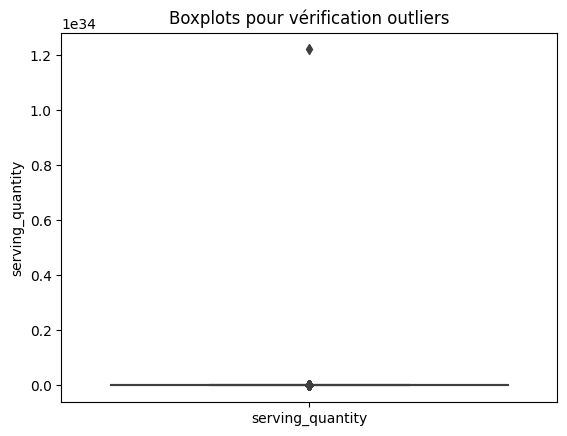

In [69]:
ax1 = sns.boxplot(df_withoutduplicatefeatures4.loc[:,["serving_quantity"]]);
ax1.set_ylabel("serving_quantity");
ax1.set_title("Boxplots pour vérification outliers");

In [84]:
df_withoutduplicatefeatures4['serving_quantity'].max()

1.22235667886445e+34

In [85]:
df_withoutduplicatefeatures4['serving_quantity'].min()

0.0

### Additifs
plus de 300 additifs autorisés par la réglementation européenne sont susceptibles de se trouver dans les aliments transformés, pas forcément de outliers

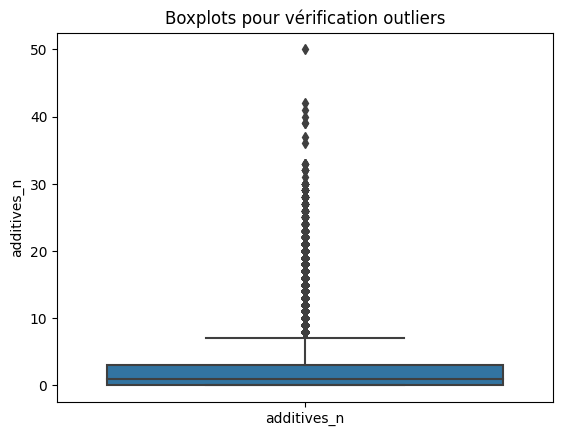

In [70]:
ax2 = sns.boxplot(df_withoutduplicatefeatures4.loc[:,["additives_n"]]);
ax2.set_ylabel("additives_n");
ax2.set_title("Boxplots pour vérification outliers");

In [81]:
df_withoutduplicatefeatures4['additives_n'].max()

50.0

### Nutrition score

OK --> échelle de -15 à 40 : https://quoidansmonassiette.fr/comment-est-calcule-le-nutri-score-logo-nutritionnel/

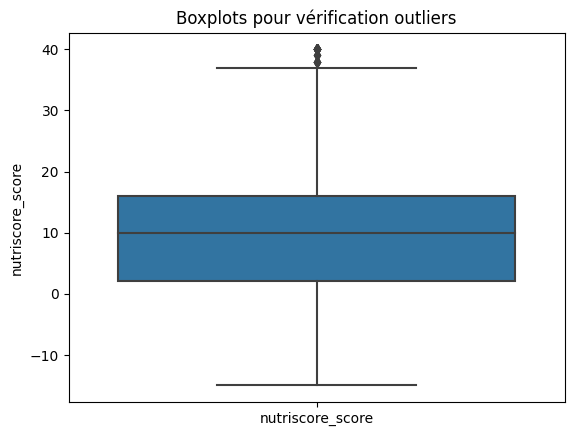

In [71]:
ax3 = sns.boxplot(df_withoutduplicatefeatures4.loc[:,["nutriscore_score"]]);
ax3.set_ylabel("nutriscore_score");
ax3.set_title("Boxplots pour vérification outliers");

In [82]:
df_withoutduplicatefeatures4['nutriscore_score'].max()

40.0

In [83]:
df_withoutduplicatefeatures4['nutriscore_score'].min()

-15.0

### Nova group
Pas de outliers
La classification NOVA assigne un groupe aux produits alimentaires en fonction du degré de transformation qu'ils ont subi :
Groupe 1 - Aliments non transformés ou transformés minimalement
Groupe 2 - Ingrédients culinaires transformés
Groupe 3 - Aliments transformés
Groupe 4 - Produits alimentaires et boissons ultra-transformés

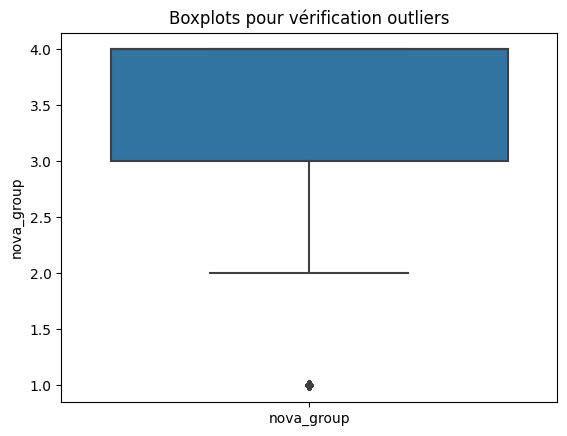

In [72]:
ax3 = sns.boxplot(df_withoutduplicatefeatures4.loc[:,["nova_group"]]);
ax3.set_ylabel("nova_group");
ax3.set_title("Boxplots pour vérification outliers");

### Ecoscore
Le score est borné dans l'intervalle [0, 100] --> OUTLIERS (source : https://docs.score-environnemental.com/methodologie-recette/fonctionnement-general-recette#score-100-single-score-normalise-100-+-bonus-malus)

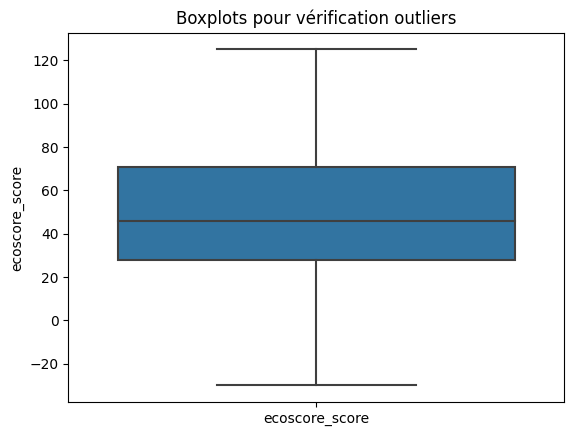

In [73]:
ax3 = sns.boxplot(df_withoutduplicatefeatures4.loc[:,["ecoscore_score"]]);
ax3.set_ylabel("ecoscore_score");
ax3.set_title("Boxplots pour vérification outliers");

In [98]:
df_withoutduplicatefeatures4.loc[(df_withoutduplicatefeatures4['ecoscore_score'] < 0) | (df_withoutduplicatefeatures4['ecoscore_score'] > 100)].shape[0]

24043

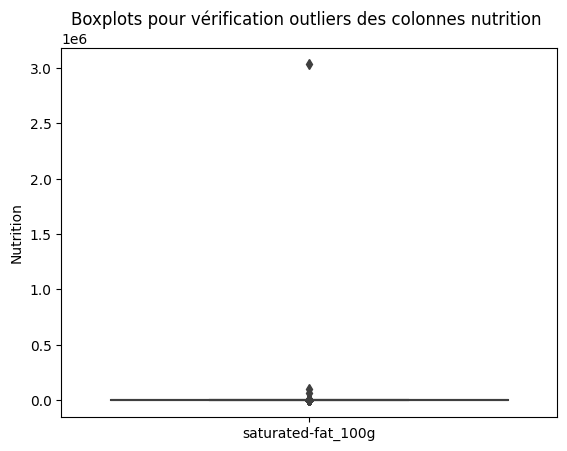

In [97]:
ax3 = sns.boxplot(df_withoutduplicatefeatures4.loc[:,['saturated-fat_100g']]);
ax3.set_ylabel("Nutrition");
ax3.set_title("Boxplots pour vérification outliers des colonnes nutrition ");

In [91]:
cols_100g = df_withoutduplicatefeatures4.filter(like='_100g').columns.tolist()
print(cols_100g)

['energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g', 'sucrose_100g', 'glucose_100g